In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM


# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

In [18]:

# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['programme']
iris = iris.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Create One-Class SVM model
clf = OneClassSVM(kernel='rbf', gamma='auto')

# Train the model on the training set
clf.fit(X_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of One-Class SVM")


Test set accuracy: 0.0


ValueError: plot_confusion_matrix only supports classifiers

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}
Accuracy score: 0.39345238095238094
Test set accuracy: 0.3442622950819672


Text(0.5, 1.0, 'Confusion Matrix of KNN')

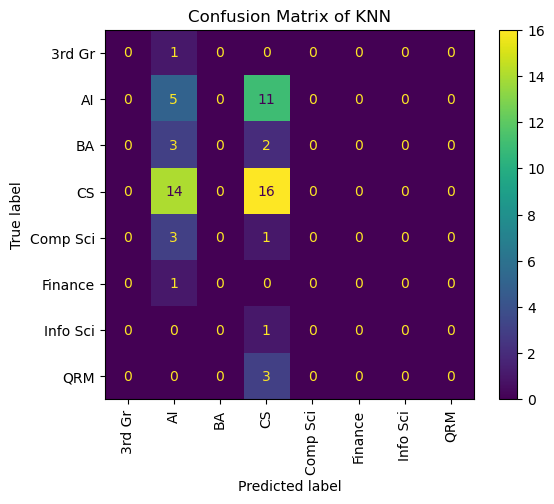

In [5]:
# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['programme']
iris = iris.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Create KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix of KNN")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 18}
Accuracy score: 0.43443877551020404
Accuracy score on the test set: 0.39344262295081966


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

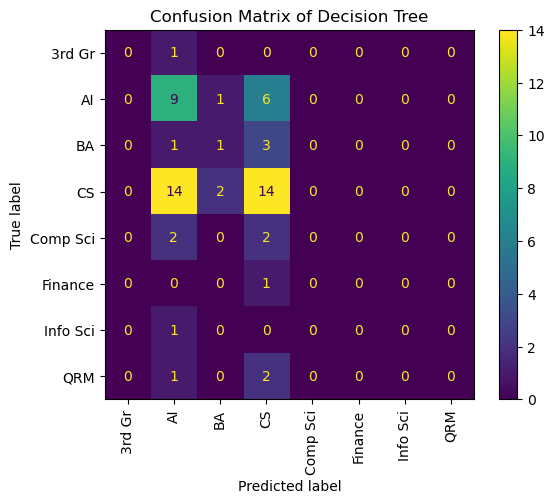

In [4]:
# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
iris = iris.dropna()

# Define the target variable and the feature matrix
target = iris['programme']
iris = iris.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'max_depth': range(20),
    'min_samples_leaf': range(20),
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score on the test set:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix of Decision Tree")

In [7]:
iris = pd.read_csv('new_data_fill_missing_with_previous_row.csv')
iris

,Tijdstempel,programme,course_ML,course_retrieval,course_statistics,course_databases,gender,ChatGPT,birthday,age,students_in_room,prev_answer_stand,stress_level,sports_per_week,random_number,bed_time,good_day_(1),good_day_(2)
0,2023-04-04 12:16:05.346,AI,1.0,0.0,1.0,0.0,1,8,1999-05-14,23.0,100.0,0.0,50.0,1.0,1,04:30:00,Work,Relationships
1,2023-04-04 12:08:33.342,AI,1.0,0.0,1.0,0.0,5,1,1997-11-23,25.0,319.0,0.0,100.0,0.0,69,23:30:00,Ashes,Not ashes
2,2023-04-04 12:08:36.017,AI,0.0,0.0,0.0,0.0,1,8,1997-11-23,25.0,600.0,0.0,60.0,2.0,42,23:00:00,good food,good sleep
3,2023-04-04 12:08:37.501,AI,0.0,0.0,1.0,0.0,2,0,1997-11-23,25.0,220.0,0.0,20.0,5.0,17,23:30:00,Sports,Friends
4,2023-04-04 12:08:51.909,Data Mining,1.0,1.0,1.0,1.0,1,1,1996-06-25,26.0,100.0,0.0,50.0,5.0,12,23:00:00,Gym,Piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2023-04-04 12:13:31.269,CS,1.0,1.0,0.0,1.0,1,8,2000-07-25,22.0,200.0,0.0,70.0,10.0,67,01:00:00,Good meal.,Nice weather.
301,2023-04-04 12:13:32.854,Exch,0.0,0.0,0.0,1.0,1,0,1996-12-13,26.0,400.0,0.0,70.0,0.0,13,01:09:00,Productive,Successful
302,2023-04-04 12:13:41.702,CS,1.0,0.0,1.0,0.0,2,0,1996-12-13,26.0,150.0,0.0,10.0,5.0,18,04:00:00,Nice people,Educational accomplishments
303,2023-04-04 12:14:41.914,AI,1.0,0.0,1.0,1.0,5,0,1996-09-04,26.0,150.0,1.0,10.0,5.0,69.,04:00:00,never before seen trauma,you :)


Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Accuracy score: 0.6639455782312924
Test set accuracy: 0.6229508196721312


Text(0.5, 1.0, 'Confusion Matrix of KNN')

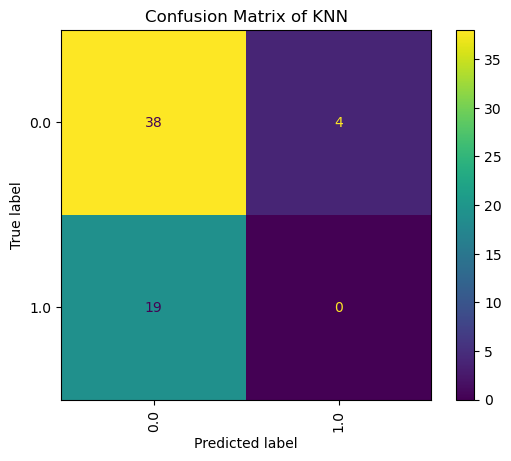

In [9]:
# Load the dataset
iris = pd.read_csv('new_data_fill_missing_with_previous_row.csv')
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['course_retrieval']
iris = iris.drop(['course_retrieval','programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Create KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix of KNN")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 9}
Accuracy score: 0.7297619047619047
Accuracy score on the test set: 0.7540983606557377


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

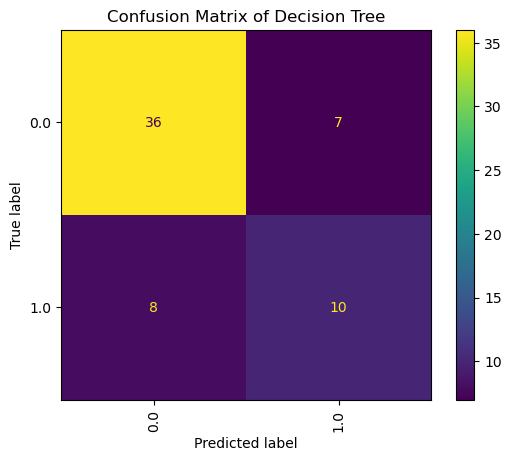

In [10]:
# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
iris = iris.dropna()

# Define the target variable and the feature matrix
target = iris['course_retrieval']
iris = iris.drop(['course_retrieval','programme',"Tijdstempel",'random_number','good_day_(1)',
                  'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'max_depth': range(20),
    'min_samples_leaf': range(20),
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score on the test set:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix of Decision Tree")